<a href="https://colab.research.google.com/github/sraeisi/Machine_Learning_Physics_Winter20/blob/master/Lec1/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets.samples_generator import make_blobs

In [0]:
X, Y = make_blobs(n_samples=100,centers=[[1,2], [10,5]])

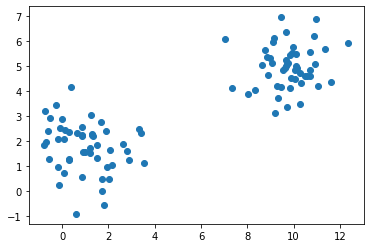

In [0]:
plt.scatter(*X.T)

In [0]:
dbscan = DBSCAN( )
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
dbscan.labels_

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,
        0,  1, -1,  1,  1,  1,  0, -1,  0,  1,  1,  0,  0,  1, -1,  1,  0,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,
        0,  1,  1,  1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  1,  0,
        0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0])

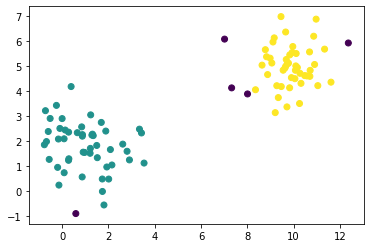

In [0]:
plt.scatter(*X.T, c=dbscan.labels_ )

In [0]:
kmeans = KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

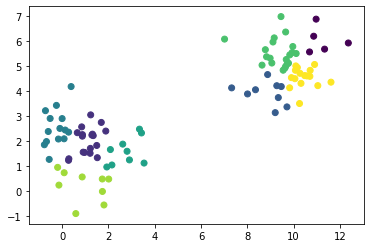

In [0]:
plt.scatter(*X.T, c=kmeans.labels_ )

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
gm = GaussianMixture( n_components=3 )
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

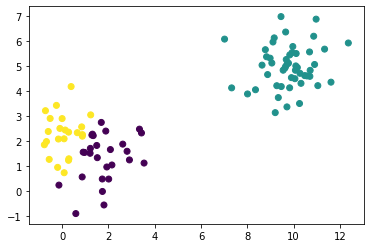

In [0]:


plt.scatter(*X.T, c=gm.predict(X))

# Real example

For this section, we use one of the datasets on Kaggle for particle identification. 
It is indicated on Kaggle that this is a 
"A somewhat simplified dataset of a GEANT based simulation of electron-proton inelastic scattering measured by a particle detector system."

See 
https://www.kaggle.com/naharrison/particle-identification-from-detector-responses/home

In [0]:

import io, requests, zipfile  ## Need these to import the data from the link I created on dropbox. 

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )

[321, 211, 2212, -11]
There are 4 types of particles in this set. 
 Here are the target values and their frequencies: 
 {211: 2806833, 2212: 1945849, 321: 232471, -11: 14847}


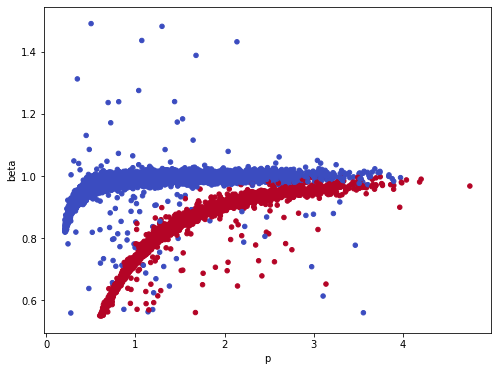

In [0]:
'''
Next we need to clean up the data a bit. 
'''

from collections import Counter
targets = list(set(data['id']))
print(targets)
target_freq = [dict( Counter(data['id'])  )[ i] for i in targets]
features = list( data.columns[1:] )
print(f"There are {len(targets)} types of particles in this set. \n Here are the target values and their frequencies: \n { dict( Counter(data['id'])  )}" )


'''
We can keep only a small portion of the data, 
this is to speed up the training in the class, 
otherwise, it is best to keep all of it.
'''
n_s = 10000
mini_data = data.sample(n_s, axis=0, random_state=0)
mini_data['target'] = mini_data['id'].apply(lambda x: targets.index(x)) 
mini_data.drop('id',axis=1, inplace=True)
mini_data.head()


'''
Let's keep only two types of particles.
'''
ind_1 = 1
ind_2 = 2
mini_data = mini_data[ (mini_data['target']==ind_1) | (mini_data['target']==ind_2) ].copy()

'''
Also for visualization purposes, we will only keep two features. 
At this point, I am going to pick p and beta. 
We will see later how I picked these two features. 
'''
f_ind_1 = 0
f_ind_2 = 2
f1 = features[f_ind_1]
f2 = features[f_ind_2]

mini_data = mini_data[[f1,f2, 'target' ]]
mini_data.head()

## Now we plot the data


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, xlabel = f1, ylabel=f2)
ax.scatter(mini_data[f1],mini_data[f2], c= mini_data['target'] , cmap=plt.cm.coolwarm, s=20)
# ax.legend()
plt.show()

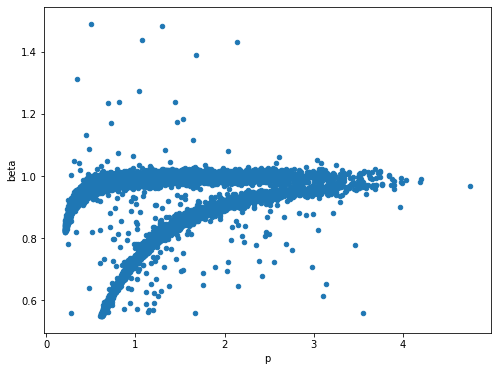

In [0]:
'''
Now consider if you are given the data without any labels. 
'''

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, xlabel = f1, ylabel=f2)
ax.scatter(mini_data[f1],mini_data[f2], cmap=plt.cm.coolwarm, s=20)
plt.show()

Try to cluster the data using different algorithms and see which one has the best performance. 